# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [3]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [4]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [5]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [18]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)
print(dataset["x"])

0     0.735932
1    -1.290702
2    -1.174542
3     0.687354
4     0.714576
5    -1.453285
6     2.148995
7    -1.169542
8     0.652131
9    -0.358119
10    1.052120
11    0.593744
12   -1.300785
13   -0.657167
14    0.113854
15   -0.416238
16   -0.682239
17    1.336341
18   -0.924233
19   -1.396090
20   -0.622020
21   -0.514864
22   -0.240567
23   -2.190875
24   -0.622502
25    2.798172
26   -0.029079
27    0.129027
28   -1.732266
29    0.329468
30    0.548256
31   -0.466080
32    0.517284
33    0.744395
34    0.164050
35    1.015686
36   -0.629884
37    0.907880
38   -0.357777
39   -0.126446
40    0.435124
41   -0.582928
42    0.016734
43    2.114462
44   -0.359248
45   -0.003546
46   -1.338465
47    0.931877
48    0.384494
49   -1.828387
Name: x, dtype: float64


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [7]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [8]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

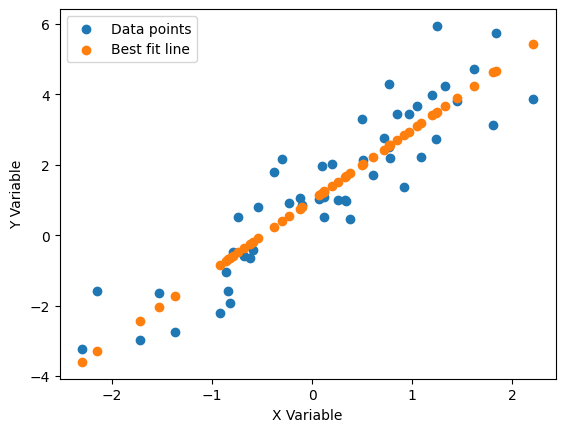

In [9]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [10]:
# Write your own code here

subset_above2 = dataset.query("y >= 2")
print( len(subset_above2)/len(dataset))


0.42


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [11]:
# Note: abs(...) is the absolute value function
# Write your own code 

ybar        = dataset["y"].mean()
stdv_sample = dataset["y"].std()
subset_data = dataset.query("abs(y - @ybar) <= @stdv_sample")



# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [12]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov_type = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [13]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.059286
x            1.964162
dtype: float64


<font size = "5">

Plot the best fit line

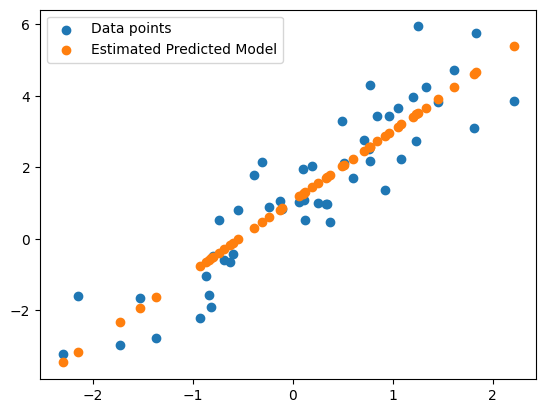

In [14]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

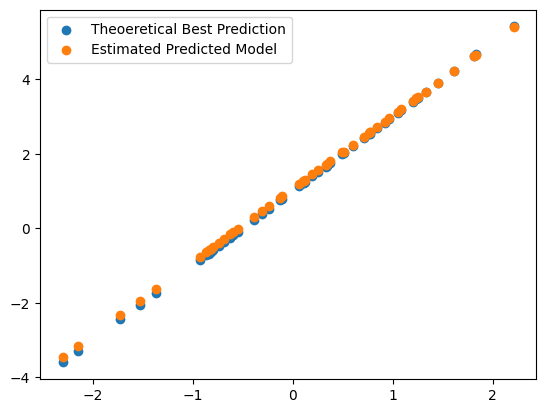

In [15]:
# Write your own code

plt.scatter(x = dataset["x"],y = dataset["p"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Theoeretical Best Prediction","Estimated Predicted Model"])
plt.show()




<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [19]:
# Write your own code

dataset["sample_error"] = dataset["y"] - dataset["p_estimated"]
fn_positive_error = lambda error: error >= 0
dataset["error_positive"] = dataset["sample_error"].apply(fn_positive_error)

print(dataset["error_positive"])

0      True
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14    False
15     True
16    False
17    False
18    False
19     True
20    False
21     True
22    False
23     True
24     True
25    False
26     True
27     True
28     True
29    False
30    False
31     True
32     True
33    False
34     True
35     True
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47     True
48     True
49     True
Name: error_positive, dtype: bool


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [17]:
# Write your own code

dataset["error_sqr"] = dataset["sample_error"]**2
dataset["error_sqr"].mean()





0.8712017166809092